# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML
sns.set()

# READING DATASET

In [2]:
data=pd.read_csv("cars_price.csv")
df=data.iloc[:,1:]

# ANALYSING PRICE ATTRIBUTE

In [3]:
df['priceUSD'].describe()

count     40000.000000
mean       7430.383775
std        8338.242134
min          95.000000
25%        2350.000000
50%        5350.000000
75%        9850.000000
max      195000.000000
Name: priceUSD, dtype: float64

(500, 25000)

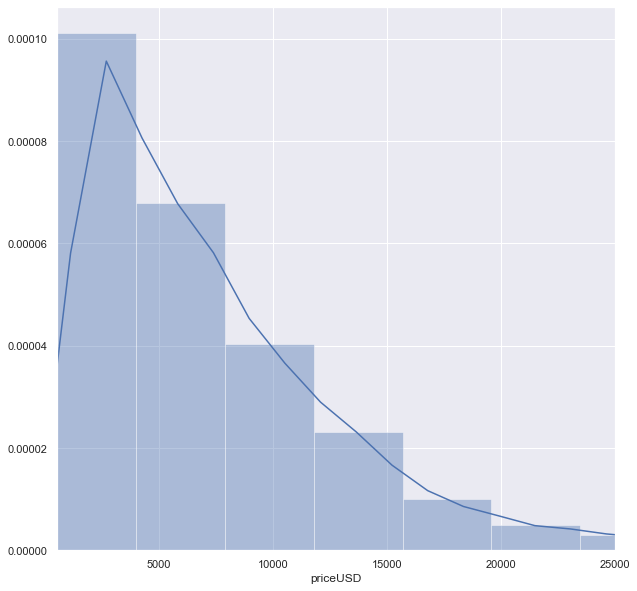

In [4]:
f, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['priceUSD'])
plt.xlim([500,25000])

# RELATIONSHIP WITH NUMERICAL FEATURES

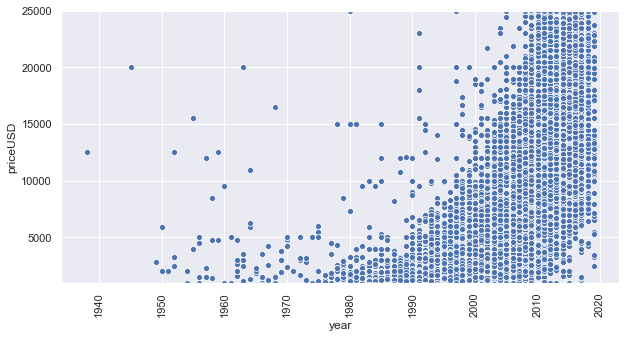

In [5]:
var = 'year'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 5))
fig = sns.scatterplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

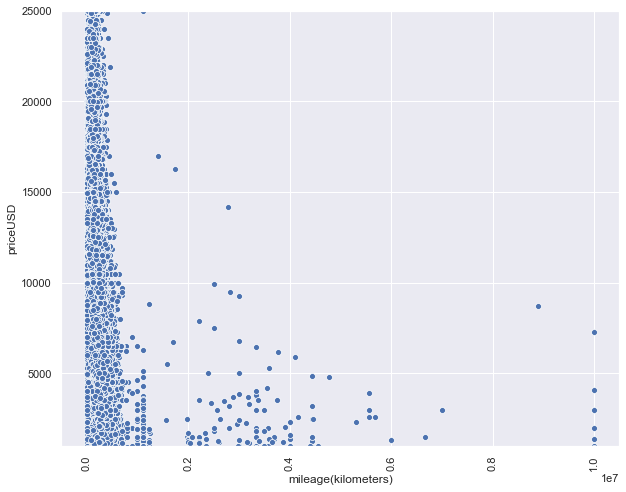

In [6]:
var = 'mileage(kilometers)'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.scatterplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

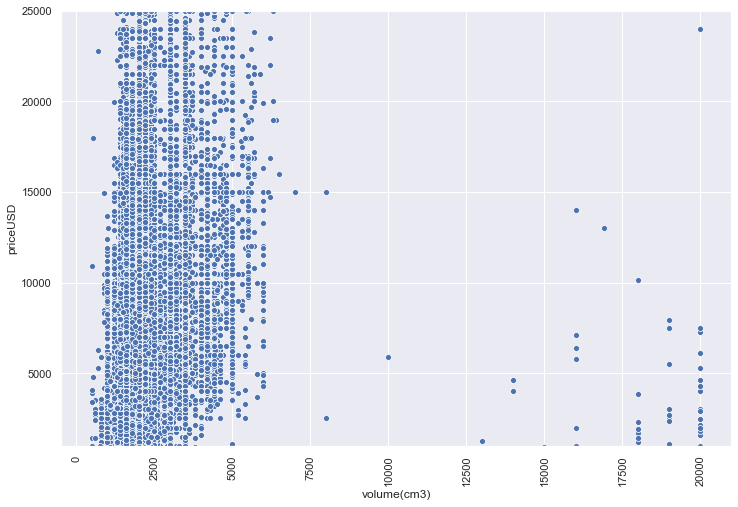

In [7]:
var = 'volume(cm3)'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.scatterplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

# RELATIONSHIP WITH CATEGORICAL FEATURES

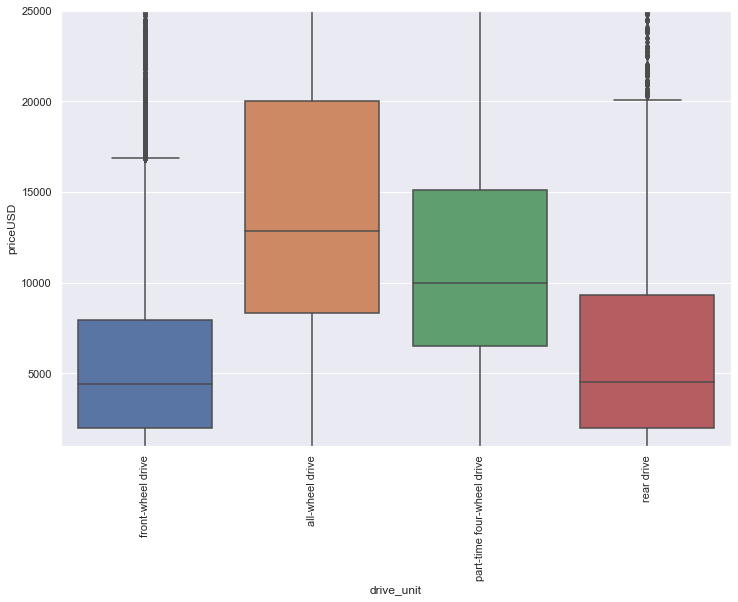

In [8]:
var = 'drive_unit'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

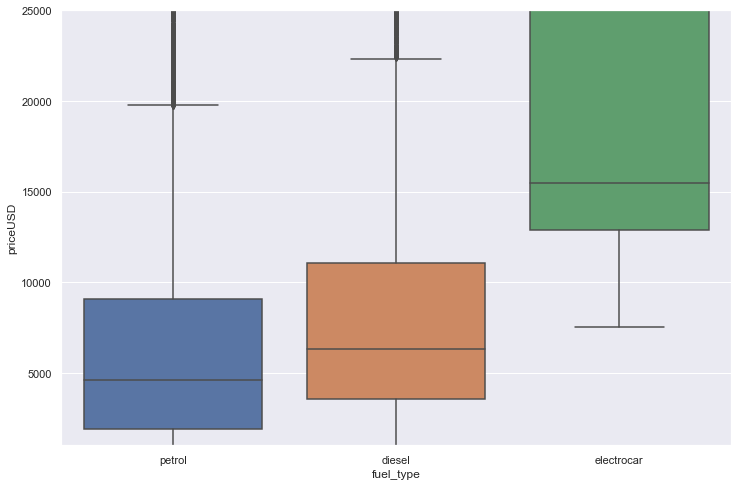

In [9]:
var = 'fuel_type'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);

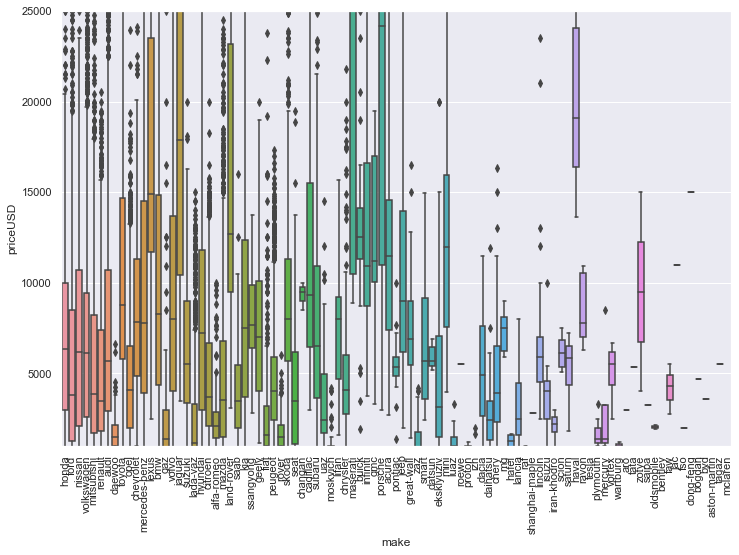

In [10]:
var = 'make'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

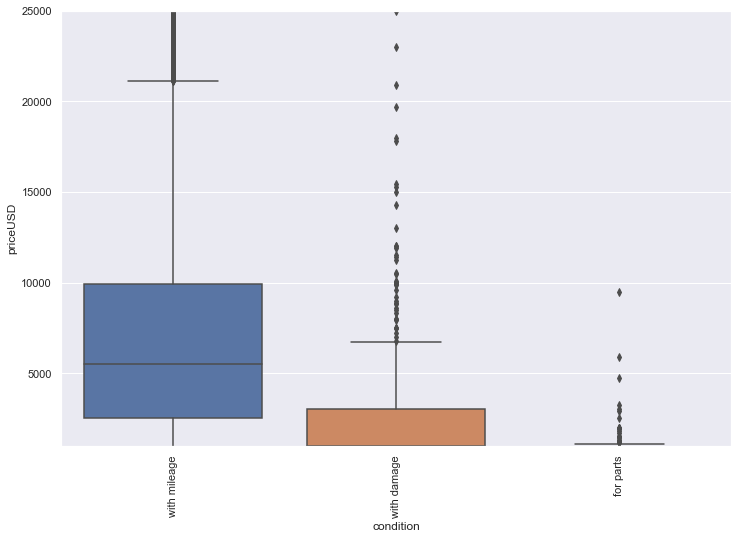

In [11]:
var = 'condition'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

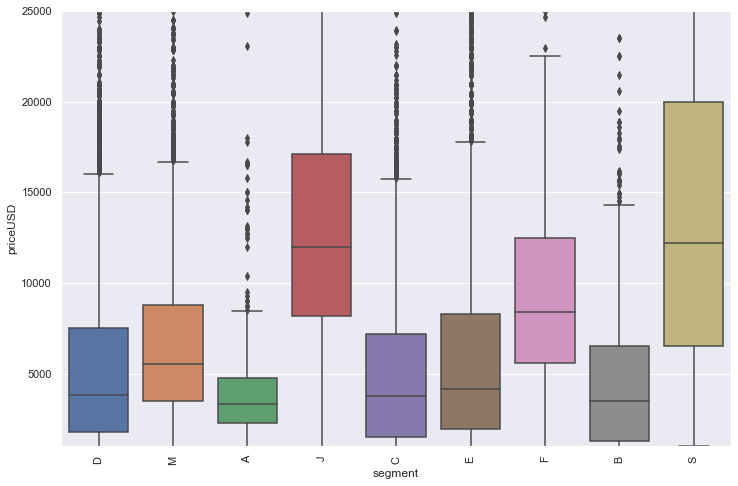

In [12]:
var = 'segment'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

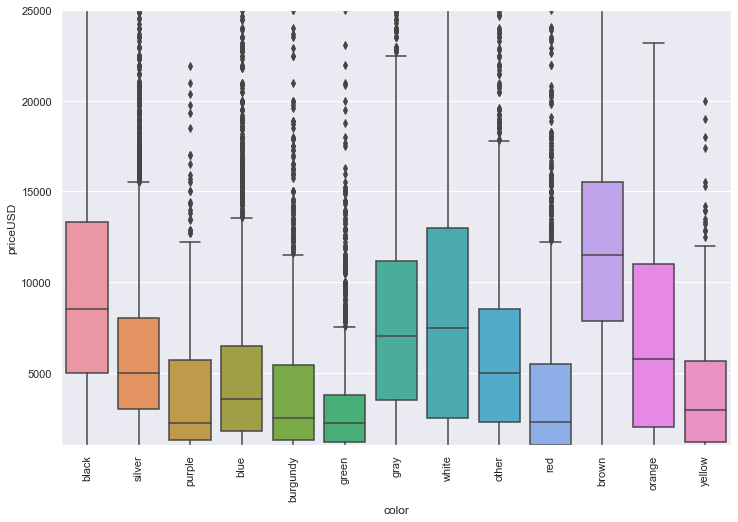

In [13]:
var = 'color'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

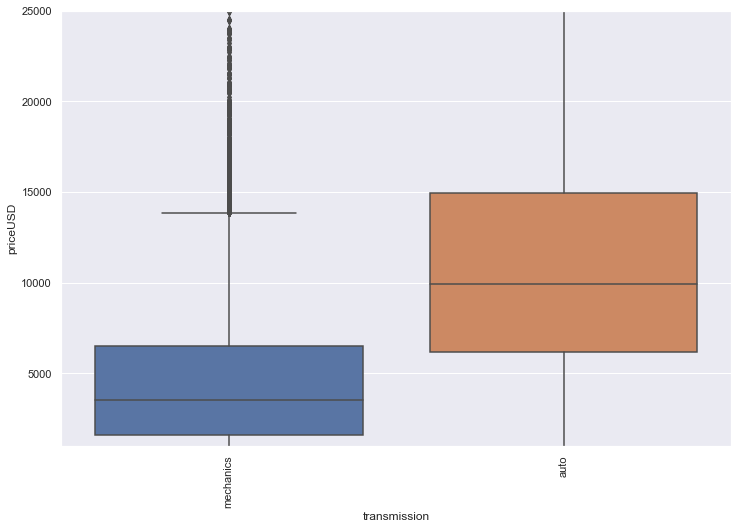

In [14]:
var = 'transmission'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=1000, ymax=25000);
plt.xticks(rotation=90);

# FEATURE IMPORTANCE RELATED TO PRICE

In [15]:
print("Find most important features relative to price")
corr = df.corr()
corr.sort_values(["priceUSD"], ascending = False, inplace = True)
print(corr.priceUSD)

Find most important features relative to price
priceUSD               1.000000
year                   0.608822
volume(cm3)            0.275745
mileage(kilometers)   -0.171794
Name: priceUSD, dtype: float64


# CORRELATION MATRIX

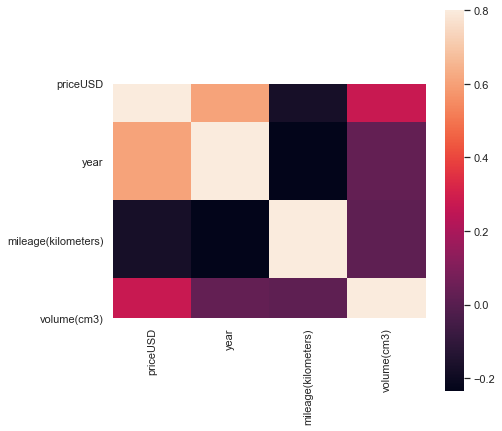

In [16]:
# General correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

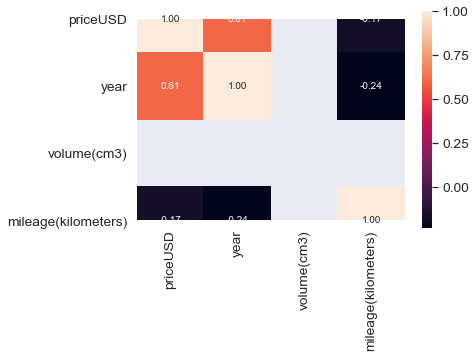

'\nThis plot shows what we said earies but in form of numbers.\n'

In [17]:
# Price correlation matrix
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, 'priceUSD')['priceUSD'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

"""
This plot shows what we said earies but in form of numbers.
"""

# SCATTERPLOTS

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


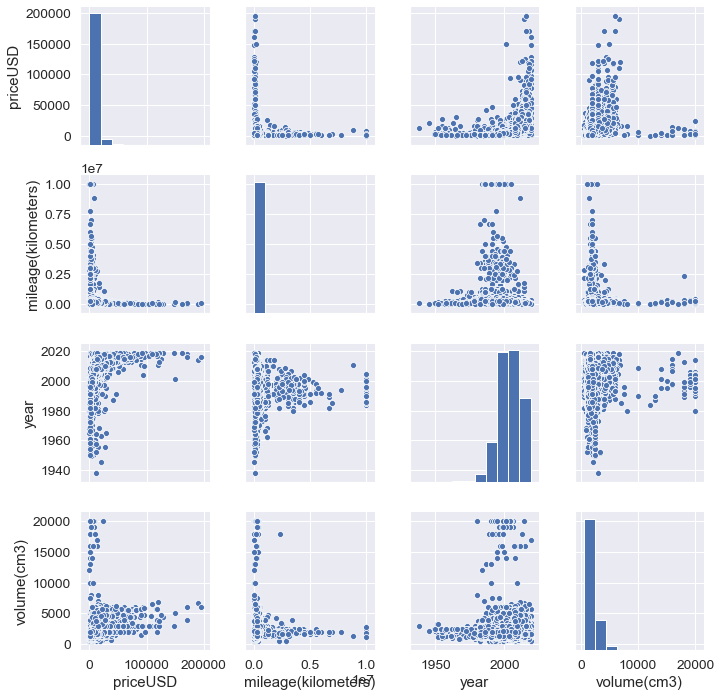

In [18]:
num_features = ["priceUSD", "mileage(kilometers)", "year","volume(cm3)"]
sns.pairplot(df[num_features], height = 2.5)
plt.show();


# CLEANING DATASET

In [19]:
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [20]:
print("Shape of data Before dropping any Row: ",df.shape)
df = df[df['volume(cm3)'].notna()]
print("Shape of data After dropping Rows with NULL values in Volume: ",df.shape)
df = df[df['drive_unit'].notna()]
print("Shape of data After dropping Rows with NULL values in drive_unit: ",df.shape)
df = df[df['segment'].notna()]
print("Shape of data After dropping Rows with NULL values in segment: ",df.shape)
df = df.reset_index(drop=True)

Shape of data Before dropping any Row:  (40000, 12)
Shape of data After dropping Rows with NULL values in Volume:  (39970, 12)
Shape of data After dropping Rows with NULL values in drive_unit:  (38626, 12)
Shape of data After dropping Rows with NULL values in segment:  (35016, 12)


In [21]:
df.isnull().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

In [22]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,35016.000000,35016.000000,3.501600e+04,35016.000000
mean,7336.923435,2003.470528,2.468547e+05,2091.419580
std,7858.066435,7.899316,3.095286e+05,922.082696
min,100.000000,1957.000000,0.000000e+00,500.000000
25%,2400.000000,1998.000000,1.420000e+05,1600.000000
50%,5400.000000,2004.000000,2.320000e+05,1984.000000
75%,9799.000000,2010.000000,3.125460e+05,2300.000000
max,170000.000000,2019.000000,9.999999e+06,20000.000000


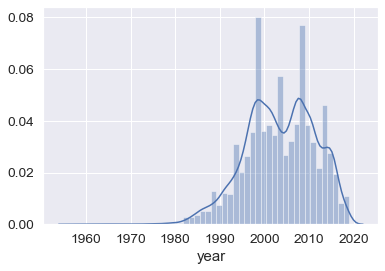

In [23]:
# Record distribution over the year
sns.distplot((df["year"]))

"\nWe can see a certain number of outliers. Now we'll try to get rid of those.\n"

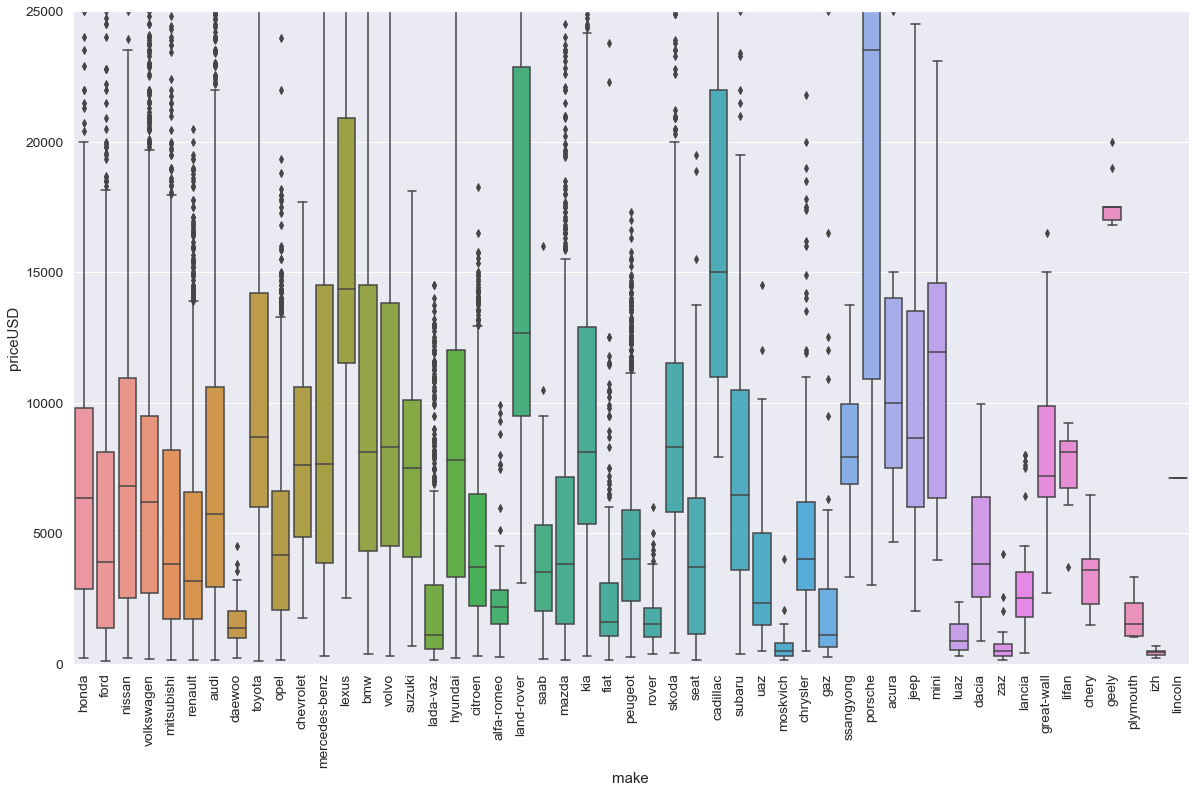

In [24]:
# Box Plot showing car manufacturer / Price range
var = 'make'
data = pd.concat([df['priceUSD'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=0, ymax=25000);
plt.xticks(rotation=90);
"""
We can see a certain number of outliers. Now we'll try to get rid of those.
"""

In [25]:
df.shape

(35016, 12)

In [26]:
from numpy import percentile
from functools import partial

category='model'

models = df[category].unique()

"""
Here we are taking the values between the 25th and 80th percentile of the 
gaussian curve.
"""
p25 = df.groupby(by=category)[category,'priceUSD'].agg(lambda x: percentile(x['priceUSD'], 25))
p80 = df.groupby(by=category)[category,'priceUSD'].agg(lambda x: percentile(x['priceUSD'], 80))

In [27]:
# Now this strategy is applied to the 3k models; it will take up to 10 minutes
# depending on the hardware
models = df[category].unique()

cars_cleaned = pd.DataFrame()

for i,m in enumerate(models):
    cars_cleaned=cars_cleaned.append(df[( (df[category] == m ) & ( (df["priceUSD"] > p25.model[m]) & (df["priceUSD"] <= p80.model[m])) ) ],ignore_index=True)

In [28]:
cars_cleaned.to_csv('cars_outliers_removed.csv')

In [29]:
cleaned_cars = pd.read_csv("cars_outliers_removed.csv", encoding='latin1', error_bad_lines=False,warn_bad_lines=False)

In [30]:
cleaned_cars.shape

(18866, 13)

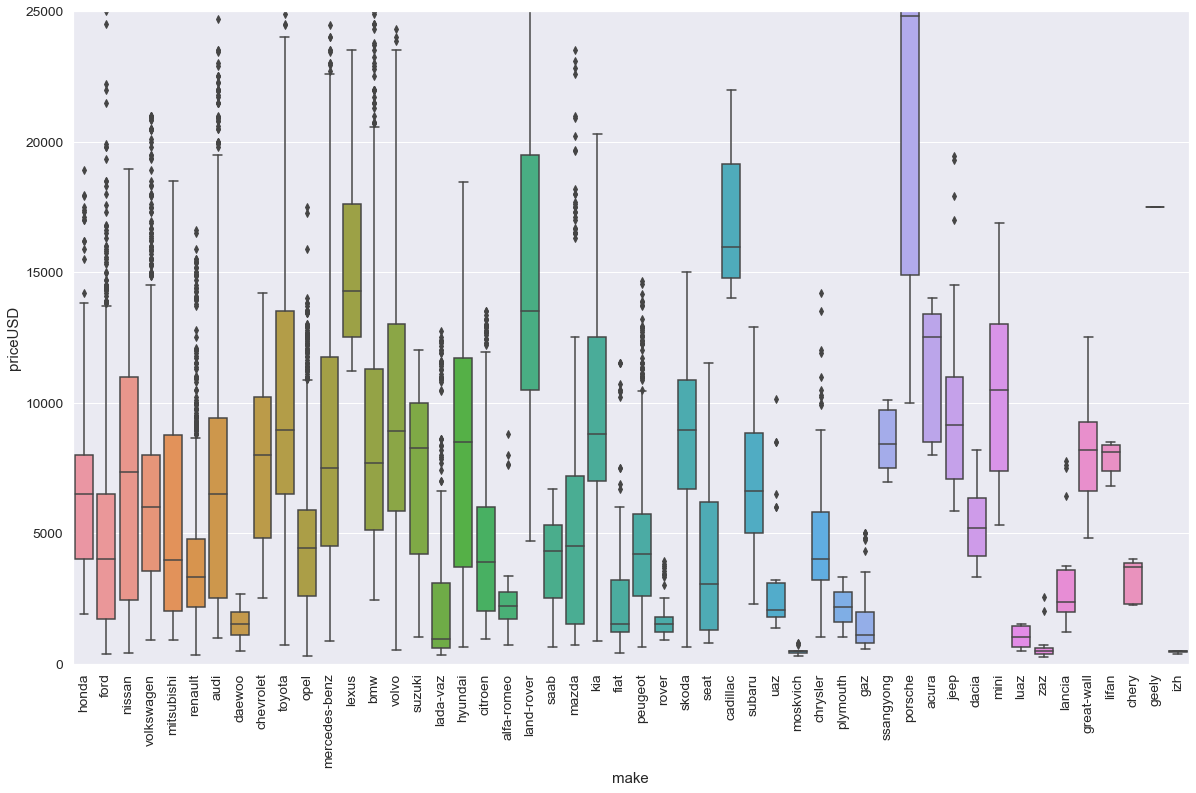

In [31]:
# Box Plot showing car manufacturer / Price range after cleaning
var = 'make'
data = pd.concat([cleaned_cars['priceUSD'], cleaned_cars[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="priceUSD", data=data)
fig.axis(ymin=0, ymax=25000);
plt.xticks(rotation=90);

In [32]:
# Drop some unuseful blank space with respect to our analysis
cleaned_cars = cleaned_cars[
        (cleaned_cars.year <= 2020) 
      & (cleaned_cars.year >= 1990)  
         ]

# Remove extra column
cleaned_cars = cleaned_cars.drop(["Unnamed: 0"], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


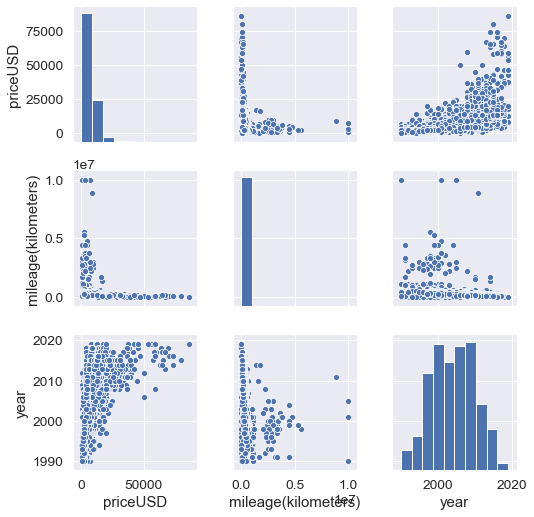

In [33]:
num_features = ["priceUSD", "mileage(kilometers)", "year"]
sns.pairplot(cleaned_cars[num_features], size = 2.5)
plt.show();

In [34]:
cleaned_cars.sample(5)

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
17246,seat,toledo,1000,1998,with mileage,111.0,petrol,1600.0,blue,mechanics,front-wheel drive,C
5721,citroen,c4-grand-picasso,12450,2015,with mileage,121600.0,diesel,1600.0,brown,mechanics,front-wheel drive,C
3054,renault,megane,2000,1999,with mileage,236000.0,petrol,1400.0,green,mechanics,front-wheel drive,C
1879,audi,a6,5600,2002,with mileage,240000.0,diesel,2500.0,blue,mechanics,front-wheel drive,E
4425,opel,omega,1800,1997,with mileage,330.0,petrol,2500.0,burgundy,mechanics,rear drive,E


In [35]:
cleaned_cars.drop(["condition"],axis=1,inplace=True)
categorical_cols = cleaned_cars.select_dtypes(include = ['object'])
categorical_cols.head()

,make,model,fuel_type,color,transmission,drive_unit,segment
0,honda,accord,petrol,purple,mechanics,front-wheel drive,D
1,honda,accord,petrol,gray,mechanics,front-wheel drive,D
2,honda,accord,petrol,other,mechanics,front-wheel drive,D
3,honda,accord,petrol,gray,auto,front-wheel drive,D
4,honda,accord,petrol,blue,mechanics,front-wheel drive,D


In [36]:
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,make_alfa-romeo,make_audi,make_bmw,make_cadillac,make_chery,make_chevrolet,make_chrysler,make_citroen,make_dacia,make_daewoo,...,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
car_df  = pd.concat([cleaned_cars, cars_dummies], axis =1)
car_df.head()

,make,model,priceUSD,year,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,...,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,honda,accord,2500,1998,198000.0,petrol,2000.0,purple,mechanics,front-wheel drive,...,0,0,0,0,1,0,0,0,0,0
1,honda,accord,3327,2000,292000.0,petrol,2000.0,gray,mechanics,front-wheel drive,...,0,0,0,0,1,0,0,0,0,0
2,honda,accord,2300,1997,280000.0,petrol,1800.0,other,mechanics,front-wheel drive,...,0,0,0,0,1,0,0,0,0,0
3,honda,accord,10000,2008,205000.0,petrol,2400.0,gray,auto,front-wheel drive,...,0,0,0,0,1,0,0,0,0,0
4,honda,accord,3899,2001,300000.0,petrol,1800.0,blue,mechanics,front-wheel drive,...,0,0,0,0,1,0,0,0,0,0


In [38]:
car_df.drop(["make","model","segment","fuel_type","color","transmission","drive_unit"],axis=1,inplace=True)

In [39]:
car_df.head()

,priceUSD,year,mileage(kilometers),volume(cm3),make_alfa-romeo,make_audi,make_bmw,make_cadillac,make_chery,make_chevrolet,...,drive_unit_part-time four-wheel drive,drive_unit_rear drive,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,2500,1998,198000.0,2000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3327,2000,292000.0,2000.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2300,1997,280000.0,1800.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,10000,2008,205000.0,2400.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3899,2001,300000.0,1800.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(car_df.iloc[:, 1:501], 
                                                    car_df.iloc[:, 0], 
                                                    test_size = 0.2, 
                                                    random_state = 100)

In [41]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Training and predicting

I'll create a Random Forest model to train on the data and use it for future predictions.

In [44]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9276105979219045